In [1]:
pip install turicreate

     |████████████████████████████████| 91.2MB 464kB/s  eta 0:00:01
     |████████████████████████████████| 3.4MB 36.0MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 21.5MB/s eta 0:00:01    |██████████████████████████████▋ | 16.6MB 21.5MB/s eta 0:00:01
     |████████████████████████████████| 421.8MB 105kB/s  eta 0:00:01�██████████▌                | 204.5MB 50.7MB/s eta 0:00:05███████████████████▏            | 252.0MB 49.9MB/s eta 0:00:04
     |████████████████████████████████| 327kB 37.3MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 23.0MB/s eta 0:00:01
     |████████████████████████████████| 51kB 19.1MB/s eta 0:00:01
     |████████████████████████████████| 450kB 43.2MB/s eta 0:00:01
     |████████████████████████████████| 51kB 17.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 21.1MB/s eta 0:00:01
     |████████████████████████████████| 71kB 21.1MB/s eta 0:00:01
     |████████████████████████████████| 3.7MB 24.7MB/s eta 0:00:01
     |████

In [2]:
import turicreate as tc;

In [4]:
sales = tc.SFrame('home_data.sframe')

In [5]:
my_SFrame = tc.SFrame()

In [7]:
tmp = tc.SArray([1.,2.,3.])

In [8]:
tmp_cubed = tmp.apply(lambda x : x**3)

In [9]:
my_SFrame['power_1'] = tmp

In [11]:
def polynomial_dataframe(feature, degree):
    poly_sframe = tc.SFrame()
    poly_sframe['power_1'] = feature
    if degree >1:
        for power in range(2,degree+1):
            name = 'power_' + str(power)
            poly_sframe[name] = feature ** power
    return poly_sframe

In [12]:
sales = sales.sort(['sqft_living','price'])

In [14]:
poly1_data = polynomial_dataframe(sales['sqft_living'],1)
poly1_data['price'] = sales['price']

In [15]:
model1 = tc.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.022863     | 4362074.696077     | 261440.790724                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

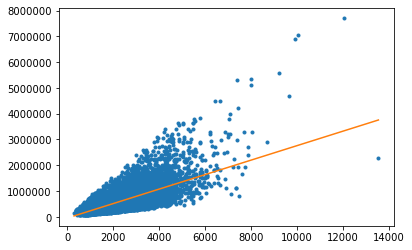

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['price'], '.',
        poly1_data['power_1'],model1.predict(poly1_data), '-')

In [19]:
print(poly1_data)

+---------+----------+
| power_1 |  price   |
+---------+----------+
|  290.0  | 142000.0 |
|  370.0  | 276000.0 |
|  380.0  | 245000.0 |
|  384.0  | 265000.0 |
|  390.0  | 228000.0 |
|  390.0  | 245000.0 |
|  410.0  | 325000.0 |
|  420.0  | 229050.0 |
|  420.0  | 280000.0 |
|  430.0  | 80000.0  |
+---------+----------+
[21613 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [20]:
poly2_data = polynomial_dataframe(sales['sqft_living'],2)
my_features = poly2_data.column_names()
poly2_data['price'] = sales['price']
model2 = tc.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.026406     | 5913020.984255     | 250948.368758                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [21]:
model2.coefficients

name,index,value,stderr
(intercept),None,199222.49644461478,7058.004835516328
power_1,None,67.99406406774321,5.287872013161801
power_2,None,0.03858123127891487,0.0008982465470323481


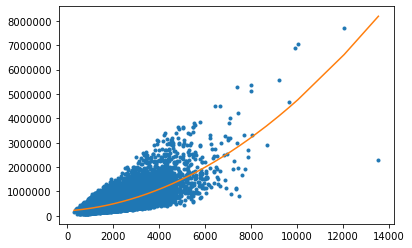

In [22]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data),'-')

In [26]:
poly3_data = polynomial_dataframe(sales['sqft_living'],3)
my_features = poly3_data.column_names()
poly3_data['price'] = sales['price']
model3 = tc.linear_regression.create(poly3_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.071791     | 3261066.736008     | 249261.286346                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [27]:
model3.coefficients

name,index,value,stderr
(intercept),None,336788.117951798,10661.01537131777
power_1,None,-90.1476236118705,10.622289184419396
power_2,None,0.08703671508097678,0.0029663062314832
power_3,None,-3.839852119597866e-06,2.2417490959001683e-07


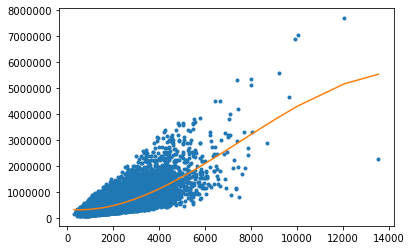

In [28]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data),'-')

In [30]:
poly15_data = polynomial_dataframe(sales['sqft_living'],15)
my_features = poly15_data.column_names()
poly15_data['price'] = sales['price']
model15 = tc.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.075369     | 2662308.584335     | 245690.511190                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [31]:
model15.coefficients

name,index,value,stderr
(intercept),None,73619.75210628664,593312.434331862
power_1,None,410.28746254848676,2949.9428791280775
power_2,None,-0.2304507144377397,6.08058877191724
power_3,None,7.588405424690668e-05,0.006874881623187978
power_4,None,-5.6570180260606194e-09,4.760370835953835e-06
power_5,None,-4.570281308521954e-13,2.1306740836434974e-09
power_6,None,2.6636020689135647e-17,6.314322654361962e-13
power_7,None,3.38584768858826e-21,1.2390026990918032e-16
power_8,None,1.1472310435298844e-25,1.5616256434209065e-20
power_9,None,-4.652935864361304e-30,1.1355498618150417e-24


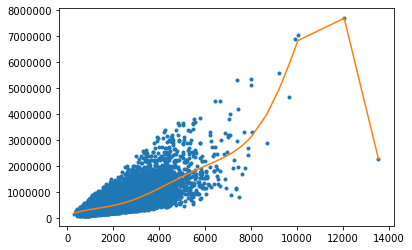

In [33]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data),'-')

In [34]:
set1, set2 = sales.random_split(.5 , seed =0)
set1_1, set1_2 = set1.random_split(.5, seed = 0)
set2_1, set2_2 = set2.random_split(.5, seed = 0)

In [49]:
def get_poly_model(set_data):
    poly15_data = polynomial_dataframe(set_data['sqft_living'], 15)
    poly15_features = poly15_data.column_names() 
    poly15_data['price'] = set_data['price'] 
    model15 = tc.linear_regression.create(poly15_data, target = 'price', features = poly15_features, validation_set = None)
    return poly15_data, model15
    
def plot_fitted_line(set_data):
    poly15_data, model15 = get_poly_model(set_data)
    return plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
           poly15_data['power_1'], model15.predict(poly15_data),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.064493     | 2195218.932306     | 248858.822200                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.035667     | 2195218.932306     | 248858.822200                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

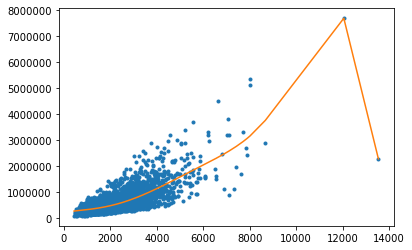

In [52]:
poly15_data,model15 = get_poly_model(set1_1)
model15.coefficients
plot_fitted_line(set1_1)

In [55]:
model15.coefficients.tail()

name,index,value,stderr
power_6,None,1.1544030339104844e-17,6.10749213904811e-13
power_7,None,1.0514586941801688e-21,9.718727089652212e-17
power_8,None,3.460496164266092e-26,1.0040117095444741e-20
power_9,None,-1.0965445392318163e-30,9.1048764883969e-25
power_10,None,-2.4203181209029504e-34,1.0932032428897115e-28
power_11,None,-1.9960120687077438e-38,1.0960500556968315e-32
power_12,None,-1.0770990389195788e-42,7.21942686419834e-37
power_13,None,-2.7286281749405743e-47,3.4338546571724185e-41
power_14,None,2.447826934034351e-51,1.6000215116540342e-45
power_15,None,5.019752326753699e-55,3.662366553408393e-50


Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.088387     | 2069212.978547     | 234840.067186                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.062267     | 2069212.978547     | 234840.067186                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

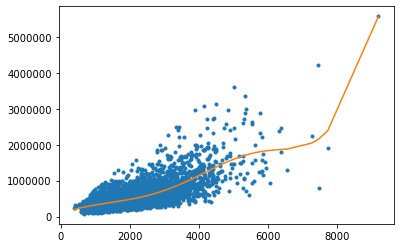

In [56]:
poly15_data,model15 = get_poly_model(set1_2)
model15.coefficients
plot_fitted_line(set1_2)

In [57]:
model15.coefficients.tail()

name,index,value,stderr
power_6,None,-1.0964134507286332e-16,nan
power_7,None,-6.364584415492852e-21,nan
power_8,None,5.52560416854716e-25,nan
power_9,None,1.3508203898197794e-28,1.5028169008795258e-23
power_10,None,1.1840818822582313e-32,3.0388810230834194e-27
power_11,None,1.9834800045379e-37,nan
power_12,None,-9.925335900144669e-41,nan
power_13,None,-1.6083484705056515e-44,nan
power_14,None,-9.120060245117016e-49,nan
power_15,None,1.6863665833555978e-52,nan


Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.038527     | 2269769.506521     | 251460.072754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.039929     | 2269769.506521     | 251460.072754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

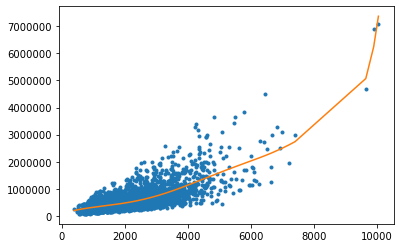

In [58]:
poly15_data,model15 = get_poly_model(set2_1)
model15.coefficients
plot_fitted_line(set2_1)

In [59]:
model15.coefficients.tail()

name,index,value,stderr
power_6,None,-3.3684259272719256e-17,6.75795389917903e-12
power_7,None,3.609997041976729e-21,1.2608093541095756e-15
power_8,None,6.469997256308929e-25,1.1093889544447856e-19
power_9,None,4.236393888725579e-29,nan
power_10,None,-3.6214942529140553e-34,1.9288193386355234e-27
power_11,None,-4.271195274189792e-37,1.4347615943175153e-31
power_12,None,-5.614459716503116e-41,1.1574135876180139e-35
power_13,None,-3.8745277299646824e-45,2.170011494582633e-39
power_14,None,4.694303605050596e-50,1.2866570614406508e-43
power_15,None,6.390458859794287e-53,2.7649163956545246e-48


Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.031677     | 2314893.173822     | 244563.136754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.036946     | 2314893.173822     | 244563.136754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

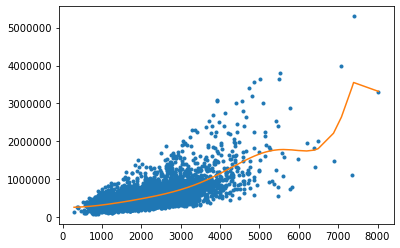

In [60]:
poly15_data,model15 = get_poly_model(set2_2)
model15.coefficients
plot_fitted_line(set2_2)

In [61]:
model15.coefficients.tail()

name,index,value,stderr
power_6,None,1.9766912054565368e-16,1.4257868876536793e-11
power_7,None,-6.157836777179924e-21,4.1789905836190426e-15
power_8,None,-4.8801230408338504e-24,8.633588090379806e-19
power_9,None,-6.621867814920517e-28,1.2690709746101285e-22
power_10,None,-2.706315832703865e-32,1.2681162569399654e-26
power_11,None,6.723704116342472e-36,8.618434813425546e-31
power_12,None,1.7411564631442787e-39,1.5607486771386278e-34
power_13,None,2.0918837567520473e-43,2.018171655639761e-38
power_14,None,4.7801556588556875e-48,1.2527274558395795e-42
power_15,None,-4.745353330737912e-51,3.113147502104108e-47


In [64]:
training_and_validation_data, test_data = sales.random_split(0.9, seed=1)
train_data, validation_data = training_and_validation_data.random_split(0.5, seed=1)

In [67]:
arr = []
for degree in range(1, 16):
    poly_data = polynomial_dataframe(train_data['sqft_living'], degree)      
    my_features = poly_data.column_names()
    poly_data['price'] = train_data['price']
    model = tc.linear_regression.create(poly_data, target = 'price', features = my_features, validation_set = None, verbose = False)
    validation_data_poly = polynomial_dataframe(validation_data['sqft_living'], degree)
    predictions = model.predict(validation_data_poly)
    residuals = validation_data['price'] - predictions
    rss = sum(residuals * residuals)
    arr.append(rss)
print(arr.index(min(arr)), min(arr))

5 589182477809741.0


In [69]:
arr2 = []
for degree in range(1, 16):
    poly_data = polynomial_dataframe(train_data['sqft_living'], degree)      
    my_features = poly_data.column_names()
    poly_data['price'] = train_data['price']
    model = tc.linear_regression.create(poly_data, target = 'price', features = my_features, 
                                              validation_set = None, verbose = False)
    test_data_poly = polynomial_dataframe(test_data['sqft_living'], degree)
    predictions = model.predict(test_data_poly)
    residuals = test_data['price'] - predictions
    rss_test = sum(residuals * residuals)
    arr2.append(rss_test)

print (arr2.index(min(arr2)), min(arr2))

7 124458964534463.89


In [71]:
model.coefficients

name,index,value,stderr
(intercept),None,115895.60821100045,848466.6267575352
power_1,None,317.96816063704216,3866.8238020870076
power_2,None,-0.1630613325374562,7.2479773813058745
power_3,None,5.6911608676589516e-05,0.007365666676446811
power_4,None,-4.33705845451144e-09,4.498331891065814e-06
power_5,None,-2.628678096238406e-13,1.7183634541256858e-09
power_6,None,1.497083249581447e-17,4.0687652840952306e-13
power_7,None,1.838010469194453e-21,5.2583248198792036e-17
power_8,None,7.430208247772017e-26,nan
power_9,None,-6.359888271586456e-31,nan
